# <center> Report of Tourism Investment - Programming for Data Science </center> #

### <center> Class of 2019/2020 </center> ###



   <center> Ana Oliveira - R2016637
    <br>
    Beatriz Cruz - R2016712
    <br>
    Catarina Palha - M20190156
    <br>
    Leonor Porto - M20190323
    <br>
    Victor Gil - M20190208 </center>

### Objective
We are a group of Data Scientists consultants that was proposed to develop a project in the tourism sector, in which our aim was to understand the trends as well as the opportunities raising around the world on this sector. 
Our client did not give us a specific goal for this project but mentioned he was interested in obtaining good insights that could lead to a more balanced outcome regarding risks and returns. 

$$Return = \frac{Profit}{Investments}$$
<br>
$$Profit = Receipts - Costs$$ 

To calculate those our client made available to us four datasets to explore.

### About the Data

- “Number of tourists arrivals per country” 
https://data.worldbank.org/indicator/ST.INT.ARVL
- “WEF Travel & Tourism Competitiveness Index” 
https://tcdata360.worldbank.org/indicators/tour.comp.comp?country=BRA&indicator=3524&viz=line_chart&years=2015,2017
- “Time required to start a business (in days)” 
https://datacatalog.worldbank.org/dataset/world-development-indicators
- “Taxes on income, profits and capital gains (% of revenue)”
 https://data.worldbank.org/indicator/GC.TAX.YPKG.RV.ZS

- International tourism, receipts (current US$)
https://data.worldbank.org/indicator/ST.INT.RCPT.CD
- Capital Investment on Travel and Tourism.
https://tcdata360.worldbank.org/indicators/cap.inv.tat?country=BRA&indicator=24674&viz=line_chart&years=1995,2028

In [63]:
#Make the necessary imports

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import seaborn as sb

## First Analysis

On this first analysis we wanted to narrow down the countries that would be more interesting to study in terms of returns and risks.


### Functions used to help us

In [64]:
def FirstLook(df):
    
    """Given a dataFrame the function prints the best insights."""
    
    print("First 5 rows of the dataFrame: \n\n", df.head())
    print("Shape: \n\n", df.shape)
    print("Columns names: \n\n", df.columns)
    print("Columns types: \n\n", df.dtypes)
    print("Description: \n\n", df.describe())    

In [65]:
#Function to remove all rows that don't represent countries.
def RemoveFalseCountries(df, serie):
    
    """Receives a dataFrame and a Serie as input and remove the false countries 
       from the dataFrame
       Returns the dataFrame without the false countries"""
    
    df = df[~serie.isin([
        
            'Andorra', 'Arab World', 'American Samoa', 'Antigua and Barbuda', 'Bahrain', 'Bermuda', 'Belize', 
            'Central Europe and the Baltics', 'Channel Islands', 'Caribbean small states', 
            'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Pacific',
            'Europe & Central Asia (excluding high income)', 'Europe & Central Asia', 'Euro area', 'European Union',
            'Fragile and conflict affected situations','Faroe Islands', 'Micronesia', 'Gibraltar', 'Guam',
            'High income', 'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total', 'IDA total',
            'IDA blend', 'IDA only', 'Isle of Man', 'Not classified', 'Jordan', 'Kiribati', 'St. Kitts and Nevis',
            'Kuwait', 'Latin America & Caribbean (excluding high income)', 'St. Lucia',
            'Latin America & Caribbean', 'Least developed countries: UN classification', 'Low income', 'Lower middle income',
            'Low & middle income', 'Late-demographic dividend', 'St. Martin (French part)', 'Middle East & North Africa',
            'Marshall Islands', 'Middle income', 'Middle East & North Africa (excluding high income)', 'Northern Mariana Islands',
            'North America', 'New Caledonia', 'OECD members', 'Other small states', 'Pre-demographic dividend',
            'West Bank and Gaza', 'Pacific island small states', 'Post-demographic dividend', 'French Polynesia'
            'South Asia', 'Solomon Islands', 'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa', 'Small states',
            'Sint Maarten (Dutch part)', 'Turks and Caicos Islands', 'East Asia & Pacific (IDA & IBRD countries)',
            'Europe & Central Asia (IDA & IBRD countries)', 'Latin America & the Caribbean (IDA & IBRD countries)', 
            'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)','Sub-Saharan Africa (IDA & IBRD countries)', 'Trinidad and Tobago',
            'Upper middle income', 'St. Vincent and the Grenadines', 'British Virgin Islands', 'Virgin Islands (U.S.)',
            'World', 'Greenland', 'Tuvalu', 'Vanuatu', 'Samoa', 'IDA only', 'French Polynesia', 'Cayman Islands', 'South Asia'

             ]) ]
    
    return df

In [66]:
def CheckNaN(df):
    
    "Check the existance of NaN values and returns a dataFrame with the rows that have NaN values"
    
    print("How many NaN values do we have on each column: \n", df.isnull().sum())
    
    return df[df.isna().any(axis = 1)]


<p>To treat the NaN values we created a function that was used for most of the datasets of this first analysis. Next we're going to describe how the function works:
    <br>
    <ol>
    <li>Drop rows that have all years with NaN values.
    <br>
    <li>Substitute the NaN values of the rows that have 2 years with NaN values by the existent year value.
    <br>
    <li>If there is only one NaN value, we took into account the evolution of the variable values over time for each country:
    <br>
       3.1 For the cases in which the year 2015 was missing, we calculated the difference between 2017 and 2016 and then we replaced the NaN value in 2015 by the 2016            value subtracted by the difference value. 
    <br>
    3.2 For the cases in which the year 2016 was missing, we replaced the value by the mean of the 2015 and 2017 values. 
    <br>
     3.3 For the cases in which the year 2017 was missing, we calculated the difference between 2016 and 2015 and then we replaced the NaN value in 2017 by the 2016 value summed by the difference value.
        </ol>

<br>
If the argument two_years is equal to True:       
<ol>
    <li> Drop rows that have two fields with NaN values.
    <li> If a row has only one NaN value, it is replaced by the non-null existent value.

In [67]:
#Function to treat Null Values
def ReplaceNaN(df1, two_years = False):
    
    """Recives a DataFrame as input and return the same dataFrame without NaN values"""
    
    if two_years == True:
        
        df1.dropna(thresh = 2)

        for i, index in df1.iterrows():

            if str(df1.loc[i,'2015']) == 'nan':

                df1.loc[i,'2015'] = df1.loc[i,'2017']

            elif str(df1.loc[i,'2017']) == 'nan':

                df1.loc[i,'2017'] = df1.loc[i,'2015']

            else: 
                continue
                
                
    for i, index in df1.iterrows():
        
        countna = 0
        
        for j in df1.columns:
            
            if str(df1.loc[i,j]) == 'nan':
                
                countna += 1
                
        if countna == 2:
            
            if str(df1.loc[i,'2015'])!='nan':
                
                df1.loc[i,'2016'] = df1.loc[i,'2015']
                df1.loc[i,'2017'] = df1.loc[i,'2015']
                
            elif str(df1.loc[i,'2016']) != 'nan':
                
                df1.loc[i,'2015'] = df1.loc[i,'2016']
                df1.loc[i,'2017'] = df1.loc[i,'2016']
                
            else:
                
                df1.loc[i,'2015'] = df1.loc[i,'2017']
                df1.loc[i,'2016'] = df1.loc[i,'2017']
                
        elif countna == 1:
            
            if str(df1.loc[i,'2015']) == 'nan': 
                
                dif = df1.loc[i,'2017'] - df1.loc[i,'2016']
                df1.loc[i,'2015'] = df1.loc[i,'2016'] - dif
                
            elif str(df1.loc[i,'2016']) == 'nan': 
                
                df1.loc[i,'2016'] = np.mean([df1.loc[i,'2015'], df1.loc[i,'2017']])
                
            else:
                
                dif = df1.loc[i,'2016'] - df1.loc[i,'2015']
                df1.loc[i,'2017'] = df1.loc[i,'2016'] + dif
                
        else: 
            continue

    df1 = df1.dropna()

    return df1

In [68]:
def BarPlot(df, column_name, year):
    """Given a df and two strings, the columns names, plots the horizontal bar plot
    and return the top 20 df sorted by year."""
    
    df = df.sort_values(by = year, ascending = False).head(20)
    
    graph = sb.barplot(x = year, y = column_name, data = df)
    plt.tight_layout()
    plt.ylabel(column_name)
    plt.xlabel("Arrivals per Country")
    plt.title("Top 20 Countries in " + year)
    plt.show()
    
    return df

# 1. Number of Tourists Arrivals per Country
This dataset contains the number of tourists who traveled to each country in the years 2015, 2016 and 2017.
<br>

The tourists most preferred countries is an important aspect to consider because returns and risks might differ according to tourists remunerated preferences. 



In [69]:
arrivals = pd.read_csv('number_of_arrivals_per_country.csv')
FirstLook(arrivals) 

First 5 rows of the dataFrame: 

   Country Name Country Code       2015       2016       2017
0        Aruba          ABW  1225000.0  1102000.0  1070500.0
1  Afghanistan          AFG        NaN        NaN        NaN
2       Angola          AGO   592000.0   397000.0   261000.0
3      Albania          ALB  3784000.0  4070000.0  4643000.0
4      Andorra          AND  2663000.0  2831000.0        NaN
Shape: 

 (207, 5)
Columns names: 

 Index(['Country Name', 'Country Code', '2015', '2016', '2017'], dtype='object')
Columns types: 

 Country Name     object
Country Code     object
2015            float64
2016            float64
2017            float64
dtype: object
Description: 

                2015          2016          2017
count  1.840000e+02  1.790000e+02  1.670000e+02
mean   6.452806e+06  6.876005e+06  7.848450e+06
std    1.293010e+07  1.325337e+07  1.443002e+07
min    2.400000e+03  2.500000e+03  2.500000e+03
25%    3.860000e+05  4.085000e+05  4.680000e+05
50%    1.523000e+06  1.7920

In [70]:
#Remove all rows that are not countries using RemoveFalseCountries function
arrivals = RemoveFalseCountries(arrivals, arrivals['Country Name'])
arrivals.shape
#This leave us with 181 countries.

(181, 5)

In [71]:
#Duplicated countries?

arrivals['Country Name'].duplicated().sum()

0

In [72]:
#We only have
CheckNaN(arrivals)

#We have 72 countries with NaN values.

How many NaN values do we have on each column: 
 Country Name     0
Country Code     0
2015            18
2016            22
2017            32
dtype: int64


,Country Name,Country Code,2015,2016,2017
1,Afghanistan,AFG,NaN,NaN,NaN
5,United Arab Emirates,ARE,NaN,NaN,NaN
16,Bangladesh,BGD,NaN,NaN,NaN
29,Botswana,BWA,1528000.0,1574000.0,NaN
30,Central African Republic,CAF,120500.0,NaN,NaN
37,Cameroon,CMR,897000.0,994000.0,NaN
38,Congo Dem Rep,COD,354000.0,351000.0,NaN
50,Djibouti,DJI,NaN,NaN,NaN
57,Eritrea,ERI,114000.0,142000.0,NaN
64,Gabon,GAB,NaN,NaN,NaN


In [73]:
#Treat Null values of arrivals data frame
arrivals = ReplaceNaN(arrivals, True)
arrivals

,Country Name,Country Code,2015,2016,2017
0,Aruba,ABW,1225000.0,1102000.0,1070500.0
2,Angola,AGO,592000.0,397000.0,261000.0
3,Albania,ALB,3784000.0,4070000.0,4643000.0
6,Argentina,ARG,5736000.0,6655000.0,6720000.0
7,Armenia,ARM,1192000.0,1260000.0,1495000.0
9,Australia,AUS,7450000.0,8269000.0,8815000.0
10,Austria,AUT,26728000.0,28121000.0,29460000.0
11,Azerbaijan,AZE,1922000.0,2044000.0,2454000.0
12,Burundi,BDI,131000.0,187000.0,299000.0
13,Belgium,BEL,8355000.0,7481000.0,8385000.0


In [74]:
#Check if there is any country that does not have any arrivals at all in any year
print(arrivals[arrivals['2015'] == 0])
print(arrivals[arrivals['2016'] == 0])
print(arrivals[arrivals['2017'] == 0])
#There aren't countries with zero arrivals for a specific year

Empty DataFrame
Columns: [Country Name, Country Code, 2015, 2016, 2017]
Index: []
Empty DataFrame
Columns: [Country Name, Country Code, 2015, 2016, 2017]
Index: []
Empty DataFrame
Columns: [Country Name, Country Code, 2015, 2016, 2017]
Index: []


#### Top 20 Countries with more tourists arrivals
After doing the initial general analysis and treatment of the arrivals dataset, we did an analysis of the top 20 countries with more arrivals per year. We also represented them all through bar plots in order to facilitate the understanding of the results.

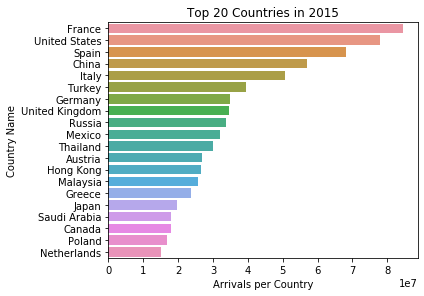

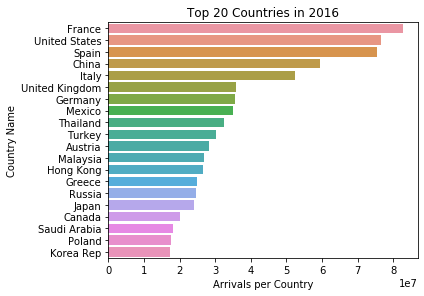

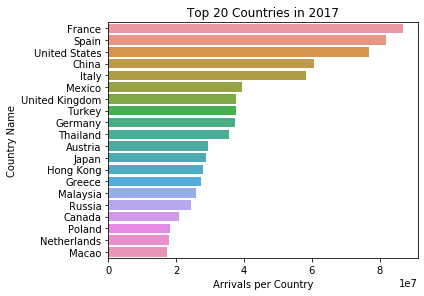

In [75]:
#Bar plot, countries with more arrivals in a choosen year
arrivals_2015 = BarPlot(arrivals, 'Country Name', '2015')
arrivals_2016 = BarPlot(arrivals, 'Country Name', '2016')
arrivals_2017 = BarPlot(arrivals, 'Country Name', '2017')

**Notice that the top 5 countries with more arrivals are always the same for every year**


In [76]:
frames = [arrivals_2015, arrivals_2016, arrivals_2017]

countries = pd.concat(frames)

top_arrivals = countries['Country Name'].drop_duplicates()

print('The chosen countries are the following\n ', top_arrivals)

The chosen countries are the following
  63             France
193     United States
58              Spain
35              China
91              Italy
187            Turkey
49            Germany
65     United Kingdom
157            Russia
121            Mexico
180          Thailand
10            Austria
79          Hong Kong
132          Malaysia
73             Greece
94              Japan
159      Saudi Arabia
31             Canada
150            Poland
138       Netherlands
101         Korea Rep
114             Macao
Name: Country Name, dtype: object


### 2. WEF Travel & Tourism Competitiveness Index

The "WEF Travel & Tourism Competitiveness Index" measures the competitiveness in travel and tourism in each country, having in mind different factors and policies that enable the sustainable development of the tourism sector. For example, "Safety and Security", "Health and Hygien", "Infrastructures" and others.

The more tourists arrivals a country has, the better the competitiveness index is, the more tourists will be interested in that country and there will be more clients for tourism businesses.

As this dataset has no values for 2016, we had to restrict our analysis to the years 2015 and 2017. Therefore, to treat the null values we used the ReplaceNaN function with the argument two_years equal to True.

In [77]:
rank = pd.read_csv('Travel & Tourism Competitiveness Index.csv', delimiter = ';')
rank.head()

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2015,2017
0,AGO,Angola,3524,"WEF Travel & Tourism Competitiveness Index, 1-...",Value,2.595036,NaN
1,AGO,Angola,3525,"WEF Travel & Tourism Competitiveness Index, 1-...",Rank,139.000000,NaN
2,AGO,Angola,3526,"WEF Enabling environment subindex, 1-7 (best)",Value,3.232427,NaN
3,AGO,Angola,3527,"WEF Enabling environment subindex, 1-7 (best)",Rank,136.000000,NaN
4,AGO,Angola,3528,WEF Travel and Tourism policy and enabling con...,Value,3.207968,NaN


<br>
<p>This dataset had lots of different variables. We had to choose one of them that could explain what we were looking for and we used: measuring the competitiveness level in tourism sector.
    
Therefore, we limitted the data set only to the indicator "WEF Travel & Tourism Competitiveness Index, 1-7 (best)" and to a subdindicator type "Rank".
<p>Each country received a value in a scale from 1 to 7, where 1 is the worst value and 7 the best. 
<p>Then, the countries were ordered according to the value and ranked from the best value to the worst.

In [78]:
rank = rank[(rank['Indicator'] == 'WEF Travel & Tourism Competitiveness Index, 1-7 (best)') & (rank['Subindicator Type'] == 'Rank')]

In [79]:
rank = rank[['Country Name','Indicator','2015','2017']]

In [80]:
FirstLook(rank)

First 5 rows of the dataFrame: 

              Country Name                                          Indicator  \
1                  Angola  WEF Travel & Tourism Competitiveness Index, 1-...   
39                Albania  WEF Travel & Tourism Competitiveness Index, 1-...   
77   United Arab Emirates  WEF Travel & Tourism Competitiveness Index, 1-...   
115             Argentina  WEF Travel & Tourism Competitiveness Index, 1-...   
153               Armenia  WEF Travel & Tourism Competitiveness Index, 1-...   

      2015  2017  
1    139.0   NaN  
39   106.0  98.0  
77    24.0  29.0  
115   57.0  50.0  
153   89.0  84.0  
Shape: 

 (145, 4)
Columns names: 

 Index(['Country Name', 'Indicator', '2015', '2017'], dtype='object')
Columns types: 

 Country Name     object
Indicator        object
2015            float64
2017            float64
dtype: object
Description: 

              2015        2017
count  140.000000  135.000000
mean    71.278571   68.785185
std     40.859307   39.409519
m

In [81]:
#Apply function RemoveFalseCountries to remove rows that are not countries:
rank = RemoveFalseCountries(rank, rank['Country Name'])

#What about duplicated countries?
rank['Country Name'].duplicated().sum()

0

In [82]:
#Check number of NaN values per column
CheckNaN(rank)

How many NaN values do we have on each column: 
 Country Name     0
Indicator        0
2015             5
2017            10
dtype: int64


,Country Name,Indicator,2015,2017
1,Angola,"WEF Travel & Tourism Competitiveness Index, 1-...",139.0,NaN
381,Benin,"WEF Travel & Tourism Competitiveness Index, 1-...",NaN,127.0
417,Burkina Faso,"WEF Travel & Tourism Competitiveness Index, 1-...",136.0,NaN
569,Bosnia and Herzegovina,"WEF Travel & Tourism Competitiveness Index, 1-...",NaN,113.0
1023,"Congo, Dem. Rep.","WEF Travel & Tourism Competitiveness Index, 1-...",NaN,133.0
1401,Ecuador,"WEF Travel & Tourism Competitiveness Index, 1-...",NaN,57.0
1817,Guinea,"WEF Travel & Tourism Competitiveness Index, 1-...",140.0,NaN
1969,Guyana,"WEF Travel & Tourism Competitiveness Index, 1-...",104.0,NaN
2121,Haiti,"WEF Travel & Tourism Competitiveness Index, 1-...",133.0,NaN
3337,Myanmar,"WEF Travel & Tourism Competitiveness Index, 1-...",134.0,NaN


In [83]:
rank = ReplaceNaN(rank, True)

#### Top 20 Countries in each year
After doing the initial general analysis and treatment of the competitiveness rank dataset, we did an analysis of the top 20 countries (20 first countries in the rank) per year.

In [84]:
rank_2015 = rank.sort_values(by = '2015').head(20)
rank_2015

,Country Name,Indicator,2015,2017
1475,Spain,"WEF Travel & Tourism Competitiveness Index, 1-...",1.0,1.0
1627,France,"WEF Travel & Tourism Competitiveness Index, 1-...",2.0,2.0
1249,Germany,"WEF Travel & Tourism Competitiveness Index, 1-...",3.0,3.0
5235,United States,"WEF Travel & Tourism Competitiveness Index, 1-...",4.0,6.0
1703,United Kingdom,"WEF Travel & Tourism Competitiveness Index, 1-...",5.0,5.0
833,Switzerland,"WEF Travel & Tourism Competitiveness Index, 1-...",6.0,10.0
191,Australia,"WEF Travel & Tourism Competitiveness Index, 1-...",7.0,7.0
2425,Italy,"WEF Travel & Tourism Competitiveness Index, 1-...",8.0,8.0
2539,Japan,"WEF Travel & Tourism Competitiveness Index, 1-...",9.0,4.0
795,Canada,"WEF Travel & Tourism Competitiveness Index, 1-...",10.0,9.0


In [85]:
rank_2017 = rank.sort_values(by = '2017').head(20)
rank_2017

,Country Name,Indicator,2015,2017
1475,Spain,"WEF Travel & Tourism Competitiveness Index, 1-...",1.0,1.0
1627,France,"WEF Travel & Tourism Competitiveness Index, 1-...",2.0,2.0
1249,Germany,"WEF Travel & Tourism Competitiveness Index, 1-...",3.0,3.0
2539,Japan,"WEF Travel & Tourism Competitiveness Index, 1-...",9.0,4.0
1703,United Kingdom,"WEF Travel & Tourism Competitiveness Index, 1-...",5.0,5.0
5235,United States,"WEF Travel & Tourism Competitiveness Index, 1-...",4.0,6.0
191,Australia,"WEF Travel & Tourism Competitiveness Index, 1-...",7.0,7.0
2425,Italy,"WEF Travel & Tourism Competitiveness Index, 1-...",8.0,8.0
795,Canada,"WEF Travel & Tourism Competitiveness Index, 1-...",10.0,9.0
833,Switzerland,"WEF Travel & Tourism Competitiveness Index, 1-...",6.0,10.0


In [86]:
frames = [rank_2015, rank_2017]

top_rank = pd.concat(frames)

print('The chosen countries are the following\n ',top_rank['Country Name'].drop_duplicates())

The chosen countries are the following
  1475                   Spain
1627                  France
1249                 Germany
5235           United States
1703          United Kingdom
833              Switzerland
191                Australia
2425                   Italy
2539                   Japan
795                   Canada
4477               Singapore
229                  Austria
2007    Hong Kong SAR, China
3755             Netherlands
4173                Portugal
3869             New Zealand
909                    China
2349                 Iceland
2273                 Ireland
3793                  Norway
2729             Korea, Rep.
4743                  Sweden
Name: Country Name, dtype: object


#### Conclusions
**Notice that in 2015 and 2017 the top 3 countries (with best rank) are the same: Germany, France and Spain.**
<br>
It is also interesting to see the evolution of Japan through years. It increased its position in the rank a lot, which made it achieve a position in the top 5 countries. On the contrary, Switzerland decreased its position in the rank, which made it move to a worse position in 2017.

### 3. Easy Doing Business on a country (EDB)

To finish this first analysis, we also considered variables that would evaluate the benefit for our client. In fact, when starting a business in a specific country, two important things to have in mind are the extra expenditures and the faced challenges that differ from country to country. 
<br>
The variables that we were able to find that could measure exactly this were the two last ones listed before. In fact, the more time it takes to start a business and the more taxes on income, profits and capital gains, the worse. Someone that is starting a business is logically more interested in having a great facility in doing so and in gaining as much money as possible (with less taxes attached to it). 

As the chosen dataset has lots of different variables, we had to choose one of them that could explain what we were looking for: 
<center> Time required to start a business in each country </center>
Therefore, we limitted the dataset only to the indicator "Time required to start a business (days)".

In [87]:
edb = pd.read_csv('WDIData.csv')

In [88]:
#Select only the necessary columns and the indicator needed for the analysis 
edb = edb[['Country Name','Indicator Name','2015','2016','2017']]

edb = edb[edb['Indicator Name'] == 'Time required to start a business (days)']

In [89]:
FirstLook(edb)

First 5 rows of the dataFrame: 

                         Country Name  \
1318                      Arab World   
2749          Caribbean small states   
4180  Central Europe and the Baltics   
5611      Early-demographic dividend   
7042             East Asia & Pacific   

                                Indicator Name       2015       2016  \
1318  Time required to start a business (days)  22.063636  23.172727   
2749  Time required to start a business (days)  22.692308  21.000000   
4180  Time required to start a business (days)  16.090909  15.727273   
5611  Time required to start a business (days)  35.137705  34.637705   
7042  Time required to start a business (days)  27.479310  25.465517   

           2017  
1318  21.559091  
2749  20.461538  
4180  15.727273  
5611  33.678689  
7042  24.541379  
Shape: 

 (264, 5)
Columns names: 

 Index(['Country Name', 'Indicator Name', '2015', '2016', '2017'], dtype='object')
Columns types: 

 Country Name       object
Indicator Name     ob

In [90]:
#Apply function RemoveFalseCountries to remove rows that are not countries:
edb = RemoveFalseCountries(edb, edb['Country Name'])

edb.shape
#183 countries

(183, 5)

In [91]:
#Check number of null values per column
CheckNaN(edb)

How many NaN values do we have on each column: 
 Country Name      0
Indicator Name    0
2015              9
2016              9
2017              9
dtype: int64


,Country Name,Indicator Name,2015,2016,2017
81454,Aruba,Time required to start a business (days),NaN,NaN,NaN
138694,Cuba,Time required to start a business (days),NaN,NaN,NaN
140125,Curacao,Time required to start a business (days),NaN,NaN,NaN
215968,"Korea, Dem. People’s Rep.",Time required to start a business (days),NaN,NaN,NaN
231709,Liechtenstein,Time required to start a business (days),NaN,NaN,NaN
236002,"Macao SAR, China",Time required to start a business (days),NaN,NaN,NaN
254605,Monaco,Time required to start a business (days),NaN,NaN,NaN
264622,Nauru,Time required to start a business (days),NaN,NaN,NaN
353344,Turkmenistan,Time required to start a business (days),NaN,NaN,NaN


In [92]:
#All the rows will be dropped, using two_year = False because in this dataset we have 3 years.
edb = ReplaceNaN(edb, False)

We decided to calculate the variation between 2015 and 2017. It means the difference of days to start a business between the year 2017 and 2015. Then, we selected the countries with variation higher or equal to zero i.e the countries in which days to start a business in 2017 are the same or lower than in the year 2015. 

In [93]:
#Let's calculate the variation of EDB from 2015 to 2017.
edb['Variation of EDB'] = edb['2017'] - edb['2015']

#We're not interested in countries with a negative variation, it means that it's harder to start a business on those countries.
edb = edb[edb['Variation of EDB'] >= 0]

In [94]:
#Let's sort the values by EDB in 2017
edb = edb.sort_values(by = '2017')
edb = edb.head(30)
edb
#These are the Top 30 of countries that is easyer to start in 2017 and with no variation since 2015

,Country Name,Indicator Name,2015,2016,2017,Variation of EDB
270346,New Zealand,Time required to start a business (days),0.5,0.5,0.5,0.0
118660,Canada,Time required to start a business (days),1.5,1.5,1.5,0.0
191641,"Hong Kong SAR, China",Time required to start a business (days),1.5,1.5,1.5,0.0
171607,Georgia,Time required to start a business (days),2.0,2.0,2.0,0.0
82885,Australia,Time required to start a business (days),2.5,2.5,2.5,0.0
313276,Singapore,Time required to start a business (days),2.5,2.5,2.5,0.0
207382,Jamaica,Time required to start a business (days),3.0,10.0,3.0,0.0
157297,Estonia,Time required to start a business (days),3.5,3.5,3.5,0.0
85747,Azerbaijan,Time required to start a business (days),3.5,3.5,3.5,0.0
144418,Denmark,Time required to start a business (days),3.5,3.5,3.5,0.0


We chose the countries that had variation equal to zero and days to start a business lower than the mean in 2017 (as this is the most recent year).

In [95]:
top_edb = edb[(edb['2017'] <=  edb['2017'].mean()) & (edb['Variation of EDB'] == 0.0)]
edb.shape
#30 countries.

(30, 6)

#### Conclusions
For 2017 the easiest countries to start a bussiness were:

In [96]:
edb['Country Name']

270346             New Zealand
118660                  Canada
191641    Hong Kong SAR, China
171607                 Georgia
82885                Australia
313276               Singapore
207382                 Jamaica
157297                 Estonia
85747               Azerbaijan
144418                 Denmark
267484             Netherlands
278932                  Norway
217399             Korea, Rep.
94333                  Belgium
112936                 Burundi
361930          United Kingdom
80023                  Armenia
70006                  Albania
224554                  Latvia
233140               Lithuania
363361           United States
284656                  Panama
205951                   Italy
228847                 Liberia
307552                 Senegal
317569                Slovenia
293242                Portugal
364792                 Uruguay
336172                  Sweden
193072                 Hungary
Name: Country Name, dtype: object

We saw the union of the two dataFrames in order to understand which countries had:
- High number of arrivals
- Good rank position

And then we saw the intersection in order to understand which ones had:
- Lower easy doing business in days

In [100]:
countries = pd.merge(top_arrivals, top_rank, on = 'Country Name', how = 'outer')

countries = pd.merge(countries, top_edb, on = 'Country Name', how = 'inner')

countries = countries['Country Name'].drop_duplicates()

countries

0                   Canada
2              Netherlands
4                Australia
6                Singapore
8     Hong Kong SAR, China
10             New Zealand
12                  Norway
14             Korea, Rep.
Name: Country Name, dtype: object

In [51]:
final_countries = list(countries)
final_countries

['Country Name', 'Indicator', '2015', '2017']

## Second Analysis

In the second analysis, our objective was to make a study looking at the investments made by each country on the tourism sector and the risks associated to it. To do this we decided to use a efficient frontier curve with the countries: Canada and Netherlands.
<br>
But first we still had some data manipulations to do.

## Countries Receipts ##

The receipts dataset explains the tourism expenditures by international inbound visitors in each country in current US$ billions. 
<p>On this dataset we used five years (2013, 2014, 2015, 2016 and 2017) to do the necessary calculations.

In [38]:
#The values are the international tourism receipts in US$
receipts = pd.read_csv('International tourism, receipts (current US$).csv', delimiter = ';')

In [39]:
receipts = receipts[['Country Name', 'Indicator Name', '2013', '2014', '2015', '2016', '2017']]

In [40]:
FirstLook(receipts)

First 5 rows of the dataFrame: 

   Country Name                                 Indicator Name          2013  \
0        Aruba  International tourism. receipts (current US$)  1.506000e+09   
1  Afghanistan  International tourism. receipts (current US$)  1.790000e+08   
2       Angola  International tourism. receipts (current US$)  1.241000e+09   
3      Albania  International tourism. receipts (current US$)  1.670000e+09   
4      Andorra  International tourism. receipts (current US$)           NaN   

           2014          2015          2016          2017  
0  1.625000e+09  1.664000e+09  1.632000e+09  1.733000e+09  
1  1.210000e+08  8.700000e+07  6.900000e+07  1.900000e+07  
2  1.597000e+09  1.171000e+09  6.280000e+08  8.840000e+08  
3  1.848000e+09  1.613000e+09  1.820000e+09  2.049000e+09  
4           NaN           NaN           NaN           NaN  
Shape: 

 (264, 7)
Columns names: 

 Index(['Country Name', 'Indicator Name', '2013', '2014', '2015', '2016',
       '2017'],
     

In [41]:
#82 rows are false countries, let's remove them
countries_receipts = RemoveFalseCountries(receipts, receipts['Country Name'])
countries_receipts.shape

#182 countries.

(182, 7)

In [42]:
#Problem on Country Code and indicador name.
#Replacing the values on Indicador Name column for 'International tourism. receipts (current US$)' by index

#To see the indexes 
wrong_indicator = countries_receipts[countries_receipts['Indicator Name'] != 'International tourism. receipts (current US$)']

#print(wrong_indicator)

countries_receipts['Indicator Name'][41] = 'International tourism. receipts (current US$)'
countries_receipts['Indicator Name'][42] = 'International tourism. receipts (current US$)'
countries_receipts['Indicator Name'][65] = 'International tourism. receipts (current US$)'
countries_receipts['Indicator Name'][84] = 'International tourism. receipts (current US$)'
countries_receipts['Indicator Name'][94] = 'International tourism. receipts (current US$)'
countries_receipts['Indicator Name'][110] = 'International tourism. receipts (current US$)'
countries_receipts['Indicator Name'][124] = 'International tourism. receipts (current US$)'
countries_receipts['Indicator Name'][144] = 'International tourism. receipts (current US$)'
countries_receipts['Indicator Name'][191] = 'International tourism. receipts (current US$)'
countries_receipts['Indicator Name'][252] = 'International tourism. receipts (current US$)'
countries_receipts['Indicator Name'][260] = 'International tourism. receipts (current US$)'

## Countries Investments ##
This data set describes the amount of capital investment in travel and tourism by country in US$ in billions (Real Price).
<p>We also considered the years 2013, 2014, 2015, 2016 and 2017 to do the necessary calculations.


In [43]:
investments = pd.read_csv('Tourism_indicators.csv', delimiter = ';')

In [58]:
investments = investments[['Country Name', 'Indicator', 'Subindicator Type', '2013', '2014', '2015', '2016', '2017']]

We wanted to look into 'Capital investment in Travel and Tourism' Indicator and 'US$ in billions (Real prices)' Subindicator Type.

In [59]:
investments = investments[(investments['Indicator'] == 'Capital investment in Travel and Tourism') 
                            & (investments['Subindicator Type'] == 'US$ in bn (Real prices)')]

In [60]:
FirstLook(investments)

First 5 rows of the dataFrame: 

              Country Name                                 Indicator  \
37                  Aruba  Capital investment in Travel and Tourism   
103                Angola  Capital investment in Travel and Tourism   
169               Albania  Capital investment in Travel and Tourism   
235  United Arab Emirates  Capital investment in Travel and Tourism   
301             Argentina  Capital investment in Travel and Tourism   

           Subindicator Type      2013      2014      2015      2016      2017  
37   US$ in bn (Real prices)  0.193966  0.190947  0.188123  0.192187  0.193334  
103  US$ in bn (Real prices)  1.036170  1.181470  1.354330  1.201440  1.258650  
169  US$ in bn (Real prices)  0.205990  0.207414  0.222613  0.232963  0.269852  
235  US$ in bn (Real prices)  6.052980  6.423950  7.135300  6.758190  6.922800  
301  US$ in bn (Real prices)  6.958850  6.648080  6.855830  6.578700  7.188790  
Shape: 

 (177, 8)
Columns names: 

 Index(['Country 

In [61]:
countries_investments = RemoveFalseCountries(investments, investments['Country Name'])

countries_investments.shape
#We have 162 countries that have made investments

(162, 8)

In [62]:
#Tranform columns to rows
countries_receipts = countries_receipts.melt(id_vars = ["Country Name", "Indicator Name"], 
                                           var_name = "Year",  value_name = "Receipts")

countries_investments = countries_investments.melt(id_vars = ["Country Name", "Indicator","Subindicator Type"], 
                                                   var_name = "Year", value_name = "Investments")

In [63]:
#Merge the dataFrames on the interception, leaving 160 countries to use.

df = pd.merge(countries_receipts, countries_investments, on = ['Country Name', 'Year'])

#We don't need the Indicators columns anymore, let's drop them
df = df.drop(['Indicator Name', 'Indicator', 'Subindicator Type'], axis = 1)

#To see the which of the final countries had data on receipts and on investments
df = df[df['Country Name'].isin(final_countries)]

df['Country Name'].unique()

array(['Australia', 'Canada', 'Netherlands', 'Norway', 'New Zealand',
       'Singapore'], dtype=object)

The country that we used on the efficient frontier were:
- Australia
- New Zealand
- Canada
- Netherlands
- Singapore

## Efficient Frontier ##

In order to measure how our client should invest in each country, we plotted the efficient frontier curve of 2017. The **efficient frontier** is the set of solutions that offer the highest expected return for a defined level of risk.

<ol>
<li>The return is how much a country actually gains with the investment.</li>
<li>The risk is the standard desviation of the return of the country.</li>
<li>The risk measures the volatility in the country.</li>
<li>The efficient frontier is the return in function of the risk
</ol>

To calculate the return on business tourism per country, we need to know the costs related to this type of business. Given the fact that we were not able to find any dataset with this information online, we assumed that the costs equal 40% of our receipts.

Note: We decided to make this assumption based on the information of this site: (https://www.planprojections.com/projections/expense-forecasting/)

We are also making some assumptions:

- Investors are rational and avoid risks whenever possible

- Investors aim for the maximum returns for their investment

- All investors share the aim maximizing their expected returns

- Commissions and taxes on the market are left out of consideration

We learned these economic factors like returns of an investment and efficient frontier on: 
    
- https://www.investopedia.com/terms/r/returnoninvestment.asp
    
- https://www.investopedia.com/terms/e/efficientfrontier.asp

## How to interpret the curve?
This image was taken at: https://investinganswers.com/dictionary/e/efficient-frontier

<img src="efficient_frontier.jpeg">

Let's start by doing the necessary data manipulations and cleaning.

In [64]:
#First let's transform receipts into bn (as investments is also in billions) ir order to have the variables in the same scale.

df['Receipts'] = df['Receipts'] / 1000000000

In [65]:
#Costs column
#Multiplys all values in the Receipts column 0.4

df['Costs'] = (0.4 * df['Receipts'])
df

,Country Name,Year,Receipts,Investments,Costs
6,Australia,2013,32.889,16.95750,13.1556
23,Canada,2013,20.941,10.16880,8.3764
100,Netherlands,2013,19.429,5.94866,7.7716
101,Norway,2013,7.175,4.13363,2.8700
103,New Zealand,2013,7.434,1.83386,2.9736
121,Singapore,2013,19.231,12.42740,7.6924
155,Australia,2014,33.619,15.27940,13.4476
172,Canada,2014,20.802,10.96350,8.3208
249,Netherlands,2014,19.669,4.27835,7.8676
250,Norway,2014,7.503,3.84587,3.0012


In [66]:
#Creates a profit column and a return column
df['Profits'] = df['Receipts'] - df['Costs']

df['Returns'] = df['Profits'] / df['Investments']

In [67]:
#First we calculate the mean of the return in the 5 years available

df_mean = df.groupby(['Country Name'])['Returns'].mean().reset_index()

df_mean = df_mean.rename(columns = {'Returns': 'Returns Mean'})

df_mean

,Country Name,Returns Mean
0,Australia,1.273941
1,Canada,1.012799
2,Netherlands,2.429513
3,New Zealand,2.145621
4,Norway,0.915142
5,Singapore,0.817621


In [68]:
#We're only interested in the year 2017.

df = df[df['Year'] == '2017']

df_final = pd.merge(df, df_mean, on = 'Country Name', how = 'left')
df_final

,Country Name,Year,Receipts,Investments,Costs,Profits,Returns,Returns Mean
0,Australia,2017,43.982,17.99500,17.5928,26.3892,1.466474,1.273941
1,Canada,2017,20.404,13.44030,8.1616,12.2424,0.910873,1.012799
2,Netherlands,2017,20.352,4.89207,8.1408,12.2112,2.496121,2.429513
3,Norway,2017,6.515,6.23172,2.6060,3.9090,0.627275,0.915142
4,New Zealand,2017,10.583,2.73215,4.2332,6.3498,2.324104,2.145621
5,Singapore,2017,19.707,14.50010,7.8828,11.8242,0.815456,0.817621


We are almost there now. To get the efficient frontier we just needed to simulate abstract combinations of portfolios. We used 50000 portfolios of different combinations of weights that produced different expected returns and volatility.
The volatility is the standard desviation of the returns.
<br>
Each point lying on the curve represents an optimal combinations of countries that maximises the expected return for a given level of risk.

In [69]:
countries_selected = list(df_final['Country Name'])

port_returns = []
port_volatility = []
countries_weights = []

returns = df_final['Returns Mean'].values

In [70]:
# set the number of combinations for imaginary portfolios
num_countries = len(countries_selected)
num_portfolios = 50000 #the bigger this number is the more combinations we'll have.

The weights represent the percentage of capital that our client should invest in each country.

In [71]:
#Populate the empty lists with each portfolios returns, risks and weights.

for single_portfolio in range(num_portfolios):
    
    weights = np.random.random(num_countries)
    weights /= np.sum(weights)
    
    expected_returns = np.dot(weights, returns)
    
    volatility = np.sqrt(np.dot(weights.T, np.dot(np.cov(returns), weights)))
    
    port_returns.append(expected_returns)
    port_volatility.append(volatility)
    countries_weights.append(weights)

In [72]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Expected Returns': port_returns, 'Volatility': port_volatility}
#portfolio

In [73]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for index, country in enumerate(countries_selected):
    #print(counter, symbol)
    portfolio[country + ' Weight'] = [weight[index] for weight in countries_weights]

In [74]:
df = pd.DataFrame(portfolio)

df

,Expected Returns,Volatility,Australia Weight,Canada Weight,Netherlands Weight,Norway Weight,New Zealand Weight,Singapore Weight
0,1.671252,0.331095,0.156840,0.263324,0.327884,0.006579,0.151741,0.093633
1,1.355991,0.301903,0.047644,0.178133,0.192625,0.225332,0.112497,0.243769
2,1.643591,0.359702,0.350614,0.120224,0.109290,0.013164,0.350199,0.056509
3,1.686333,0.313572,0.065927,0.144096,0.299577,0.187864,0.232905,0.069632
4,1.154997,0.353584,0.013829,0.400252,0.059019,0.176353,0.105885,0.244662
5,1.508137,0.292112,0.106092,0.119039,0.207706,0.238828,0.196371,0.131965
6,1.338767,0.310721,0.120423,0.225281,0.211145,0.281912,0.040956,0.120284
7,1.237489,0.312112,0.282665,0.109073,0.029684,0.195534,0.152618,0.230425
8,1.322916,0.285959,0.191919,0.197049,0.102299,0.156629,0.149917,0.202188
9,1.608404,0.301350,0.158102,0.201426,0.211792,0.149050,0.243526,0.036104


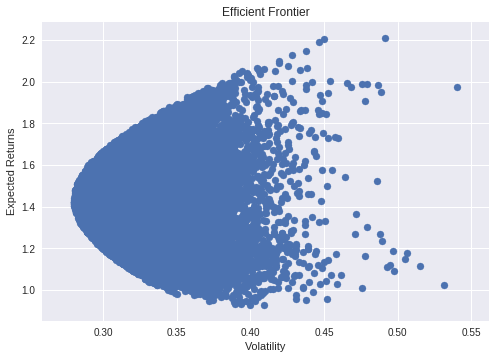

In [75]:
import seaborn as sb
import matplotlib
from matplotlib import pyplot as plt

plt.style.use('seaborn')
plt.scatter(df['Volatility'], df['Expected Returns'])
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

## But what is the optimal point?

**If all points in the Efficient Frontier Curve are optimal points what is the best of the best combinations?**

We used the Sharpe Ratio as criteria for choosing the best combination. 
<br>
Essentially we did the same thing but adding this Sharpe Ratio factor.
<br>
The Sharpe Ratio is a measure of the performance of an investment's return given its risk. In this way we can compare different investments incorporating the risks.
<br>
<br>
$$SharpeRatio = \frac{R_p - R_r}{std_p}$$
<br>

Where, 

- $R_p$ is the expected country return

- $R_r$ is the risk-free rate of return

- $std_p$ is the country standard desviation

**To simplify we're assuming that the risk-free rate is 0%.**


In [76]:
port_returns = []
port_volatility = []
countries_weights = []
sharpe_ratio = []

for single_portfolio in range(num_portfolios):
    
    weights = np.random.random(num_countries)
    weights /= np.sum(weights)

    expected_returns = np.dot(weights, returns)

    volatility = np.sqrt(np.dot(weights.T, np.dot(np.cov(returns), weights)))

    sharpe = expected_returns / volatility
    
    port_returns.append(expected_returns)
    port_volatility.append(volatility)
    countries_weights.append(weights)
    sharpe_ratio.append(sharpe)
    

In [77]:
portfolio = {'Expected Returns': port_returns, 'Volatility': port_volatility, 'Sharpe Ratio': sharpe_ratio}

In [78]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for index, country in enumerate(countries_selected):
    portfolio[country + ' Weight'] = [weight[index] for weight in countries_weights]

In [79]:
df = pd.DataFrame(portfolio)
df.head()

,Expected Returns,Volatility,Sharpe Ratio,Australia Weight,Canada Weight,Netherlands Weight,Norway Weight,New Zealand Weight,Singapore Weight
0,1.464742,0.298598,4.905407,0.042595,0.142909,0.177245,0.190541,0.222523,0.224187
1,1.387154,0.303716,4.567277,0.193492,0.063950,0.216919,0.216041,0.073824,0.235774
2,1.550373,0.312360,4.963412,0.164393,0.274256,0.191000,0.008845,0.222495,0.139010
3,1.350730,0.287879,4.692002,0.186188,0.110900,0.141589,0.205934,0.134181,0.221208
4,1.588533,0.321829,4.935954,0.042874,0.096315,0.231277,0.084475,0.264697,0.280363


Let's plot it but now coloured by the Sharpe Ratip of each portfolio's risk and returns.

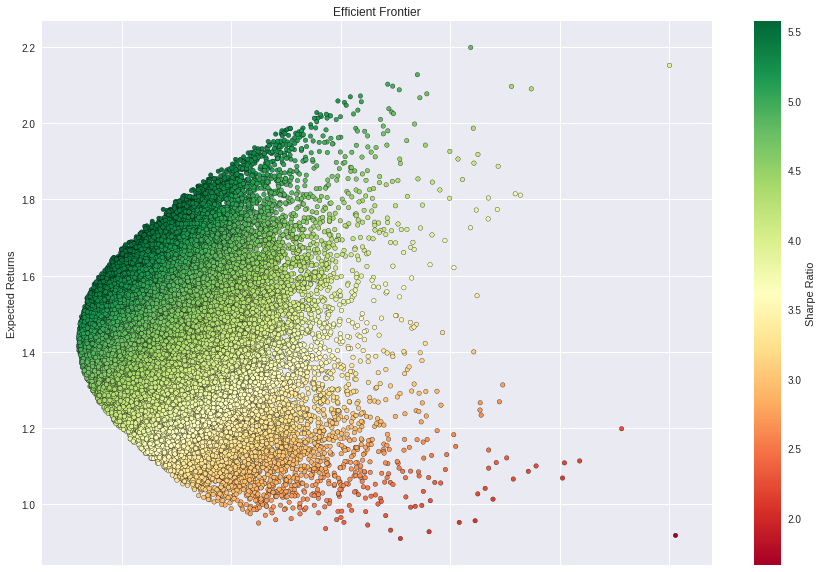

In [80]:
plt.style.use('seaborn-dark')
df.plot.scatter(x = 'Volatility', y = 'Expected Returns', c = 'Sharpe Ratio',
                cmap = 'RdYlGn', edgecolors = 'black', figsize = (15, 10), grid = True)
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

**Note that the green-points are the "good" investments, but of course this depends on what your client wants.**

We are finally in a good position to see which one is the optimal point!!
Here is what we did:

1. Find the points that have minimum Volatility and maximum Sharpe Ratio

2. Plot it again to see the points

3. Print out the best portfolios

In [81]:
sharpe_max = df[df['Sharpe Ratio'] == df['Sharpe Ratio'].max()]

std_min = df[df['Volatility'] == df['Volatility'].min()]

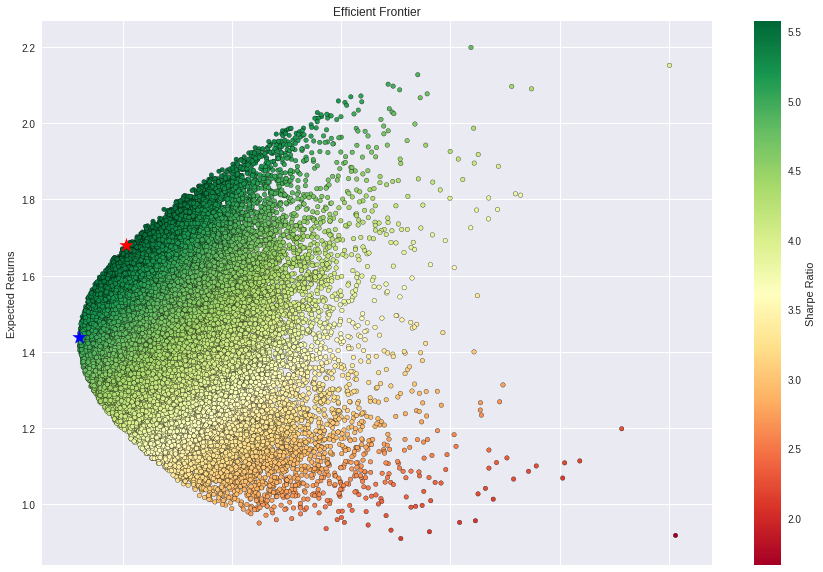

In [82]:
plt.style.use('seaborn-dark')
df.plot.scatter(x = 'Volatility', y = 'Expected Returns', c = 'Sharpe Ratio',
                cmap = 'RdYlGn', edgecolors = 'black', figsize = (15, 10), grid = True)
plt.scatter(x = sharpe_max['Volatility'], y = sharpe_max['Expected Returns'], c = 'red', marker = '*', s = 200)
plt.scatter(x = std_min['Volatility'], y = std_min['Expected Returns'], c = 'blue', marker = '*', s = 200 )
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

## Final Conclusion

Of course that the best portfolio depends on what risk and return the investor wants but these are the best possible portfolios for:
- Investors seeking the minimum risk. (The first one)
- Investors seeking the maximum risk. (The second one)



In [83]:
#Details of the points represented by the stars.
print(std_min.T)

print(sharpe_max.T)

                       44962
Expected Returns    1.439662
Volatility          0.280223
Sharpe Ratio        5.137551
Australia Weight    0.156282
Canada Weight       0.155151
Netherlands Weight  0.176339
Norway Weight       0.174939
New Zealand Weight  0.165019
Singapore Weight    0.172270
                       48982
Expected Returns    1.680729
Volatility          0.301697
Sharpe Ratio        5.570918
Australia Weight    0.161358
Canada Weight       0.106581
Netherlands Weight  0.259031
Norway Weight       0.109439
New Zealand Weight  0.256380
Singapore Weight    0.107211


This type of analysis is always based on the past, so it cannot be a guarantee of future results, but it can give us a good idea of the expected output for a specific strategy.
<br>
And of course if we change the countries set the results will be completly different.

## In case of the professor need to run it again ##

These were your best results:

<img src="final_results.png">

### How to read this? ###

Investors seeking the minimum risk would construct a portfolio which has an expected return of 1,435 billions of euros with an expected volatility of 28%.
<br>
How this investor should invest his captial in percentage?
- 17% in Australia
- 17,6% in Canada
- 16,3% in Netherlands
- 15,6% in Norway
- 17% in New Zealand
- 16,1% in Singapore

Investors seeking the maximum risk would construct a portfolio which has an expected return of 1,71 billions of euros with an expected volatility of 30%.
<br>
How this investor should invest his captial in percentage?
- 13,3% in Australia
- 14% in Canada
- 28,7% in Netherlands
- 10,6% in Norway
- 24,9% in New Zealand
- 8% in Singapore

Note that the sum of the weights is one.